# Data Analysis on Public Education Dataset

## What is the socioeconomic status of an average student in US colleges?

In [113]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import matplotlib.pyplot as plt
import requests
from scipy.stats import linregress
import scipy.stats as stats

# Import API key
from api_keys import geoapify_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

### 1. Introduction

Examining factors such as enrollment, tuition fees, graduation rates, student-faculty ratios, and financial aid availability is crucial for gaining a comprehensive understanding of the educational landscape and making informed decisions when it comes to college choices. These factors provide valuable insights into the dynamics of different institutions, allowing individuals to assess the popularity, affordability, and academic support offered by each college. By considering enrollment trends, prospective students can gauge the institution's reputation and potential opportunities. Evaluating tuition fees helps ensure that education remains accessible without causing excessive financial burden. Graduation rates reflect an institution's commitment to student success, while student-faculty ratios indicate the level of individual attention and support. Additionally, assessing financial aid availability helps determine the accessibility of higher education for those in need. Overall, a comprehensive examination of these factors empowers individuals to make informed decisions, paving the way for a fulfilling and successful college experience.

The goal of this data analysis project is to compare and analyze public and private colleges in the United States. By exploring factors such as enrollment, tuition fees, graduation rates, student-faculty ratios, and financial aid availability, we aim to gain insights into the similarities and differences between these two types of institutions. This analysis will provide a comprehensive understanding of the educational landscape, empowering individuals to make informed decisions when considering college choices.

### 2. Data Wrangling

In [114]:
raw_data = pd.read_csv("data/MERGED2021_22_PP.csv",low_memory=False)

raw_data.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR4_PP_MALE_DISCHARGE,BBRR4_PP_NOMALE_N,BBRR4_PP_NOMALE_DFLT,BBRR4_PP_NOMALE_DLNQ,BBRR4_PP_NOMALE_FBR,BBRR4_PP_NOMALE_DFR,BBRR4_PP_NOMALE_NOPROG,BBRR4_PP_NOMALE_MAKEPROG,BBRR4_PP_NOMALE_PAIDINFULL,BBRR4_PP_NOMALE_DISCHARGE
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


#### 2.1 Data Description

The dataset comprises institution-level data files from 1996-97 through 2020-21, containing aggregate data for each institution. It encompasses a wide range of information on institutional characteristics, enrollment, student aid, costs, and student outcomes. To ensure the accuracy and relevance of our analysis, we focused on the most recent data available.

To facilitate data analysis while minimizing information loss, we organized the dataset into five distinct categories:

* Institutional Characteristics:
This category includes essential details such as institution ID, name, city, state, and ZIP code. It provides key information for identifying and differentiating institutions within the dataset. Additionally, we included data on whether an institution is classified as the main campus and the highest degree awarded by the institution.

* Type:
The type category provides insights into the school type of each institution. It includes data of categorical condition of the school type. This breakdown allows for a comprehensive understanding of the tendency of school type across institutions.

* Majors:
The majors category focuses on the distribution of students across various academic disciplines. It includes information on the percentage of students enrolled in specific majors, such as agriculture, conservation, architecture, ethnic studies, communication, computer science, education, engineering, humanities, sciences, and many others. This data enables an analysis of academic interests and trends within and across institutions.

* Financial Aspects:
The financial aspects category encompasses data related to the cost of admission, tuition fees, instructional expenditure, and financial aid availability. It includes information on the average cost of admission, program-specific admission costs, tuition fees, the percentage of students receiving Pell grants, and the percentage of students with federal loans. These metrics offer insights into the financial considerations and support available to students at different institutions.

* Ethnicity with Gender Breakdown:
The ethnicity with gender breakdown category provides a comprehensive view of the student population by combining ethnicity and gender. It includes enrollment proportions for different demographic groups, such as white males, white females, black males, black females, Hispanic males, Hispanic females, Asian males, Asian females, and more. This breakdown allows for an examination of the representation of various ethnic and gender groups within the student body.

Organizing the data into these five categories enhances the clarity and structure of the dataset, enabling more effective analysis and comparison of public and private colleges in the United States.

#### 2.2 Data Exploration

In [115]:
#pd.set_option('display.max_rows', None)

# Calculate the sum of null values for each column
null_sum = raw_data.isnull().sum()  

# Get the total number of rows in the DataFrame
column_count = len(raw_data)  

 # Calculate the percentage of null values for each column
null_percentage = (null_sum / column_count) 

# Filter the results to include only columns with null percentage less than 30%
filtered_results = null_percentage[null_percentage < 0.3]
print(filtered_results.to_frame())

                                   0
UNITID                      0.000000
OPEID                       0.003057
OPEID6                      0.003057
INSTNM                      0.000000
CITY                        0.000000
...                              ...
BBRR4_PP_NOMALE_DFR         0.000000
BBRR4_PP_NOMALE_NOPROG      0.000000
BBRR4_PP_NOMALE_MAKEPROG    0.000000
BBRR4_PP_NOMALE_PAIDINFULL  0.000000
BBRR4_PP_NOMALE_DISCHARGE   0.000000

[732 rows x 1 columns]


During the data analysis process, we applied a filter to include only columns with null percentages lower than 30%. From this refined list, we carefully selected the columns for further analysis. However, it is worth noting that we made an exception for two significant factors: the cost of admission and the admission rate. Despite these columns exceeding the 30% null threshold, we recognized their importance and decided to include them in our investigation. By doing so, we aimed to ensure a comprehensive evaluation of these crucial aspects, considering their relevance in the context of our study.

In [116]:
select_data = raw_data[[
    "UNITID",
    "INSTNM",
    "CITY",
    "STABBR",
    "ZIP",
    "MAIN",
    "HIGHDEG",
    "LATITUDE",
    "LONGITUDE",
    "CONTROL",
    "OPENADMP",
    "HBCU",
    "PBI",
    "ANNHI",
    "TRIBAL",
    "AANAPII",
    "HSI",
    "NANTI",
    "MENONLY",
    "WOMENONLY",
    "PCIP01",
    "PCIP03",
    "PCIP04",
    "PCIP05",
    "PCIP09",
    "PCIP10",
    "PCIP11",
    "PCIP12",
    "PCIP13",
    "PCIP14",
    "PCIP15",
    "PCIP16",
    "PCIP19",
    "PCIP22",
    "PCIP23",
    "PCIP24",
    "PCIP25",
    "PCIP26",
    "PCIP27",
    "PCIP29",
    "PCIP30",
    "PCIP31",
    "PCIP38",
    "PCIP39",
    "PCIP40",
    "PCIP41",
    "PCIP42",
    "PCIP43",
    "PCIP44",
    "PCIP45",
    "PCIP46",
    "PCIP47",
    "PCIP48",
    "PCIP49",
    "PCIP50",
    "PCIP51",
    "PCIP52",
    "PCIP54",
    "UGDS",
    "UGDS_WHITE",
    "UGDS_BLACK",
    "UGDS_HISP",
    "UGDS_ASIAN",
    "UGDS_AIAN",
    "UGDS_NHPI",
    "UGDS_2MOR",
    "UGDS_NRA",
    "UGDS_UNKN",
    "COSTT4_A",
    "COSTT4_P",
    "TUITFTE",
    "INEXPFTE",
    "PCTPELL",
    "PCTFLOAN",
    "UG25ABV",
    "UGDS_MEN",
    "UGDS_WOMEN",
    "SCHTYPE", 
    "STUFACR",
    "IRPS_2MOR",
    "IRPS_AIAN",
    "IRPS_ASIAN",
    "IRPS_BLACK",
    "IRPS_HISP",
    "IRPS_NHPI",
    "IRPS_NRA",
    "IRPS_UNKN",
    "IRPS_WHITE",
    "IRPS_WOMEN",
    "IRPS_MEN"
]]

column_dictionary = {
    "UNITID":"id",
    "INSTNM":"name",
    "CITY":"city",
    "STABBR":"state",
    "ZIP":"zipcode",
    # 1: main campus, 0: not main campus
    "MAIN" : "main_campus",
    # "Highest degree awarded 0 Non-degree-granting, 1 Certificate degree, 2 Associate degree, 3 Bachelor's degree, 4 Graduate degree"
    "HIGHDEG":"highest_degree",
    "LATITUDE":"lat",
    "LONGITUDE":"lng",
    "CONTROL" : "control",
    "OPENADMP" : "openadmp",
    # 1: yes, 0: no
    "HBCU":"historicalblack_college",
    "PBI":"black_college",
    "ANNHI":"native_college",
    "TRIBAL":"tribal_college",
    "AANAPII":"asian_college",
    "HSI":"hispanic_college",
    "NANTI":"native_college",
    "MENONLY":"men_college",
    "WOMENONLY":"women_college",
    "PCIP01":"percentage_of_agriculture_major",
    "PCIP03":"percentage_of_conservation_major",
    "PCIP04":"percentage_of_architecture_major",
    "PCIP05":"percentage_of_ethniic_major",
    "PCIP09":"percentage_of_communication_major",
    "PCIP10":"percentage_of_techincalsupport_major",
    "PCIP11":"percentage_of_computerscience_major",
    "PCIP12":"percentage_of_culinary_major",
    "PCIP13":"percentage_of_education_major",
    "PCIP14":"percentage_of_engineer_major",
    "PCIP15":"percentage_of_engineertech_major",
    "PCIP16":"percentage_of_language_major",
    "PCIP19":"percentage_of_family_major",
    "PCIP22":"percentage_of_legal_major",
    "PCIP23":"percentage_of_english_major",
    "PCIP24":"percentage_of_humanities_major",
    "PCIP25":"percentage_of_science_major",
    "PCIP26":"percentage_of_biology_major",
    "PCIP27":"percentage_of_math_major",
    "PCIP29":"percentage_of_appliedscience_major",
    "PCIP30":"percentage_of_interdisciplinary_major",
    "PCIP31":"percentage_of_fitness_major",
    "PCIP38":"percentage_of_philosophy_major",
    "PCIP39":"percentage_of_theology_major",
    "PCIP40":"percentage_of_physic_major",
    "PCIP41":"percentage_of_sciencetech_major",
    "PCIP42":"percentage_of_psychology_major",
    "PCIP43":"percentage_of_security_major",
    "PCIP44":"percentage_of_administration_major",
    "PCIP45":"percentage_of_sociology_major",
    "PCIP46":"percentage_of_trade_major",
    "PCIP47":"percentage_of_mechanic_major",
    "PCIP48":"percentage_of_production_major",
    "PCIP49":"percentage_of_transportation_major",
    "PCIP50":"percentage_of_visualart_major",
    "PCIP51":"percentage_of_health_major",
    "PCIP52":"percentage_of_business_major",
    "PCIP54":"percentage_of_history_major",
    "UGDS":"student_count",
    "UGDS_WHITE":"enrollment_proportion_white",
    "UGDS_BLACK":"enrollment_proportion_black",
    "UGDS_HISP":"enrollment_proportion_hispanic",
    "UGDS_ASIAN":"enrollment_proportion_asian",
    "UGDS_AIAN":"enrollment_proportion_native",
    "UGDS_NHPI":"enrollment_proportion_pacific",
    "UGDS_2MOR":"enrollment_proportion_mix",
    "UGDS_NRA":"enrollment_proportion_nonresident",
    "UGDS_UNKN":"enrollment_proportion_unknown",
    "COSTT4_A" : "cost_of_admission",
    "COSTT4_P" : "cost_of_admission_p",
    "TUITFTE":"tuition",
    "INEXPFTE":"instructional_expenditure",
    "PCTPELL":"percentage_of_pellgrant",
    "PCTFLOAN":"percentage_of_federalloan",
    "UG25ABV":"pecentage_of_over25",
    "UGDS_MEN":"enrollment_percentage_man",
    "UGDS_WOMEN":"enrollment_percentage_women",
    "SCHTYPE": "public/private",
    "STUFACR":"faculity_ratio_student",
    "IRPS_2MOR":"faculity_ratio_mix",
    "IRPS_AIAN":"faculity_ratio_native",
    "IRPS_ASIAN":"faculity_ratio_asian",
    "IRPS_BLACK":"faculity_ratio_black",
    "IRPS_HISP":"faculity_ratio_hispanic",
    "IRPS_NHPI":"faculity_ratio_pacific",
    "IRPS_NRA":"faculity_ratio_nonresident",
    "IRPS_UNKN":"faculity_ratio_unknown",
    "IRPS_WHITE":"faculity_ratio_white",
    "IRPS_WOMEN":"faculity_ratio_women",
    "IRPS_MEN":"faculity_ratio_men"
}

# Make a copy of the DataFrame
rename_data = select_data.copy()

# Rename the columns using the dictionary
rename_data.rename(columns=column_dictionary, inplace=True)

# merging cost and admission columns
rename_data["cost_of_admission"] = rename_data["cost_of_admission"].combine_first(rename_data["cost_of_admission_p"])


In [117]:
test_location = rename_data[[
    "id",
    "name",
    "city",
    "state",
    "main_campus",
    "highest_degree",
    "zipcode",
    "lat",
    "lng",
    "student_count",
    "public/private",
    "control",
    "openadmp"
]]


test_location_clean = test_location.dropna()
test_location_clean.head()

,id,name,city,state,main_campus,highest_degree,zipcode,lat,lng,student_count,public/private,control,openadmp
0,100654,Alabama A & M University,Normal,AL,1,4,35762,34.783368,-86.568502,5098.0,1.0,1,2.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,4,35294-0110,33.505697,-86.799345,13284.0,1.0,1,2.0
2,100690,Amridge University,Montgomery,AL,1,4,36117-3553,32.362609,-86.174010,251.0,2.0,2,1.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,4,35899,34.724557,-86.640449,7358.0,1.0,1,2.0
4,100724,Alabama State University,Montgomery,AL,1,4,36104-0271,32.364317,-86.295677,3495.0,1.0,1,2.0


In [118]:
test_type = rename_data[[
    "id",
    "name",
    "historicalblack_college",
    "black_college",
    "native_college",
    "tribal_college",
    "asian_college",
    "hispanic_college",
    "native_college",
    "men_college",
    "women_college"
]]

test_type_clean = test_type.dropna()
test_type_clean.head()

,id,name,historicalblack_college,black_college,native_college,native_college,tribal_college,asian_college,hispanic_college,native_college,native_college,men_college,women_college
0,100654,Alabama A & M University,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100663,University of Alabama at Birmingham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100690,Amridge University,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100706,University of Alabama in Huntsville,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100724,Alabama State University,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
test_ethnicity = rename_data[[
    "id",
    "name",
    "enrollment_proportion_white",
    "enrollment_proportion_black",
    "enrollment_proportion_hispanic",
    "enrollment_proportion_asian",
    "enrollment_proportion_native",
    "enrollment_proportion_pacific",
    "enrollment_proportion_mix",
    "enrollment_proportion_nonresident",
    "enrollment_proportion_unknown",
    "enrollment_percentage_man",
    "enrollment_percentage_women",
    "faculity_ratio_student",
    "faculity_ratio_mix",
    "faculity_ratio_native",
    "faculity_ratio_asian",
    "faculity_ratio_black",
    "faculity_ratio_hispanic",
    "faculity_ratio_pacific",
    "faculity_ratio_nonresident",
    "faculity_ratio_unknown",
    "faculity_ratio_white",
    "faculity_ratio_women",
    "faculity_ratio_men"
]]

test_ethnicity_clean = test_ethnicity.dropna()
test_ethnicity_clean.head()

,id,name,enrollment_proportion_white,enrollment_proportion_black,enrollment_proportion_hispanic,enrollment_proportion_asian,enrollment_proportion_native,enrollment_proportion_pacific,enrollment_proportion_mix,enrollment_proportion_nonresident,...,faculity_ratio_native,faculity_ratio_asian,faculity_ratio_black,faculity_ratio_hispanic,faculity_ratio_pacific,faculity_ratio_nonresident,faculity_ratio_unknown,faculity_ratio_white,faculity_ratio_women,faculity_ratio_men
0,100654,Alabama A & M University,0.0184,0.8978,0.0114,0.0014,0.0027,0.0010,0.0108,0.0086,...,0.0047,0.0995,0.6540,0.0000,0.0000,0.0758,0.0095,0.1469,0.5024,0.4976
1,100663,University of Alabama at Birmingham,0.5297,0.2458,0.0669,0.0767,0.0021,0.0004,0.0483,0.0233,...,0.0015,0.1575,0.0619,0.0319,0.0012,0.0569,0.0004,0.6808,0.4433,0.5567
2,100690,Amridge University,0.2470,0.6932,0.0438,0.0000,0.0000,0.0040,0.0000,0.0000,...,0.0000,0.0000,0.0294,0.0000,0.0000,0.0000,0.0000,0.9706,0.1471,0.8529
3,100706,University of Alabama in Huntsville,0.7196,0.0871,0.0610,0.0357,0.0080,0.0012,0.0446,0.0166,...,0.0085,0.1823,0.0513,0.0256,0.0000,0.0484,0.0000,0.6809,0.4644,0.5356
4,100724,Alabama State University,0.0152,0.9259,0.0129,0.0020,0.0017,0.0014,0.0132,0.0166,...,0.0000,0.1584,0.6063,0.0136,0.0000,0.0000,0.0090,0.2127,0.4796,0.5204


In [120]:
test_major = rename_data[[
    "id",
    "name",
    "percentage_of_agriculture_major",
    "percentage_of_conservation_major",
    "percentage_of_architecture_major",
    "percentage_of_ethniic_major",
    "percentage_of_communication_major",
    "percentage_of_techincalsupport_major",
    "percentage_of_computerscience_major",
    "percentage_of_culinary_major",
    "percentage_of_education_major",
    "percentage_of_engineer_major",
    "percentage_of_engineertech_major",
    "percentage_of_language_major",
    "percentage_of_family_major",
    "percentage_of_legal_major",
    "percentage_of_english_major",
    "percentage_of_humanities_major",
    "percentage_of_science_major",
    "percentage_of_biology_major",
    "percentage_of_math_major",
    "percentage_of_appliedscience_major",
    "percentage_of_interdisciplinary_major",
    "percentage_of_fitness_major",
    "percentage_of_philosophy_major",
    "percentage_of_theology_major",
    "percentage_of_physic_major",
    "percentage_of_sciencetech_major",
    "percentage_of_psychology_major",
    "percentage_of_security_major",
    "percentage_of_administration_major",
    "percentage_of_sociology_major",
    "percentage_of_trade_major",
    "percentage_of_mechanic_major",
    "percentage_of_production_major",
    "percentage_of_transportation_major",
    "percentage_of_visualart_major",
    "percentage_of_health_major",
    "percentage_of_business_major",
    "percentage_of_history_major"
]]

test_major_clean = test_major.dropna()
test_major_clean.head()

,id,name,percentage_of_agriculture_major,percentage_of_conservation_major,percentage_of_architecture_major,percentage_of_ethniic_major,percentage_of_communication_major,percentage_of_techincalsupport_major,percentage_of_computerscience_major,percentage_of_culinary_major,...,percentage_of_administration_major,percentage_of_sociology_major,percentage_of_trade_major,percentage_of_mechanic_major,percentage_of_production_major,percentage_of_transportation_major,percentage_of_visualart_major,percentage_of_health_major,percentage_of_business_major,percentage_of_history_major
0,100654,Alabama A & M University,0.0445,0.0071,0.0053,0.000,0.0000,0.0285,0.0658,0.0,...,0.0409,0.0249,0.0,0.0,0.0,0.0,0.0231,0.0000,0.1637,0.0000
1,100663,University of Alabama at Birmingham,0.0000,0.0000,0.0000,0.002,0.0333,0.0000,0.0229,0.0,...,0.0195,0.0239,0.0,0.0,0.0,0.0,0.0249,0.2088,0.2159,0.0141
2,100690,Amridge University,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0,...,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.5000,0.0000
3,100706,University of Alabama in Huntsville,0.0000,0.0000,0.0000,0.000,0.0140,0.0000,0.0692,0.0,...,0.0000,0.0127,0.0,0.0,0.0,0.0,0.0407,0.1341,0.1930,0.0073
4,100724,Alabama State University,0.0000,0.0000,0.0000,0.000,0.0923,0.0000,0.0530,0.0,...,0.0648,0.0196,0.0,0.0,0.0,0.0,0.0511,0.0904,0.1513,0.0059


In [121]:
test_financial = rename_data[[
    "id",
    "name",
    "tuition",
    "cost_of_admission",
    "instructional_expenditure",
    "percentage_of_pellgrant",
    "percentage_of_federalloan",
    "pecentage_of_over25"
]]

test_financial_clean = test_financial.dropna()
test_financial_clean.head()

,id,name,tuition,cost_of_admission,instructional_expenditure,percentage_of_pellgrant,percentage_of_federalloan,pecentage_of_over25
0,100654,Alabama A & M University,9243.0,21924.0,7699.0,0.6853,0.6552,0.0617
1,100663,University of Alabama at Birmingham,11678.0,26248.0,14264.0,0.3253,0.4401,0.1794
3,100706,University of Alabama in Huntsville,8246.0,24869.0,8156.0,0.2377,0.3578,0.1519
4,100724,Alabama State University,8535.0,21938.0,9459.0,0.7205,0.7637,0.0677
5,100751,The University of Alabama,13731.0,31050.0,8912.0,0.1712,0.3454,0.0735


After conducting a thorough data cleaning process, we successfully filtered and refined the dataset, ensuring that only columns with null percentages below 30% were included. The cleaned data was then stored in a dedicated folder, organized and ready for further analysis. It is important to note that despite the general filtering criterion, we made a deliberate decision to include two key factors, namely the cost of admission and the admission rate, even though they exceeded the 30% null threshold. Recognizing their significance in our study, we believed that it was essential to incorporate these variables to obtain a comprehensive understanding of the data. By organizing and preserving the cleaned dataset in the designated folder, we have established a solid foundation for subsequent analyses and exploration of the data.

In [122]:
# File path to save the CSV file

file_list = [
        "test_location_clean",
        "test_type_clean",
        "test_ethnicity_clean",
        "test_major_clean",
        "test_financial_clean"
]

file_path = [
       'data/school_location.csv',
       'data/school_type.csv',
       'data/school_ethnicity.csv',
       'data/school_major.csv',
       'data/school_financial.csv'
]

for i, filename in enumerate(file_list):
    dataframe = globals()[filename]
    file = file_path[i]

    # Save the dataframe as CSV using the specified file path
    dataframe.to_csv(file, index=False)

    print(f"CSV file '{filename}' saved successfully at '{file}'.")

print("All CSV files saved successfully.")

CSV file 'test_location_clean' saved successfully at 'data/school_location.csv'.
CSV file 'test_type_clean' saved successfully at 'data/school_type.csv'.
CSV file 'test_ethnicity_clean' saved successfully at 'data/school_ethnicity.csv'.
CSV file 'test_major_clean' saved successfully at 'data/school_major.csv'.
CSV file 'test_financial_clean' saved successfully at 'data/school_financial.csv'.
All CSV files saved successfully.


#### 2.3 Data Visualization

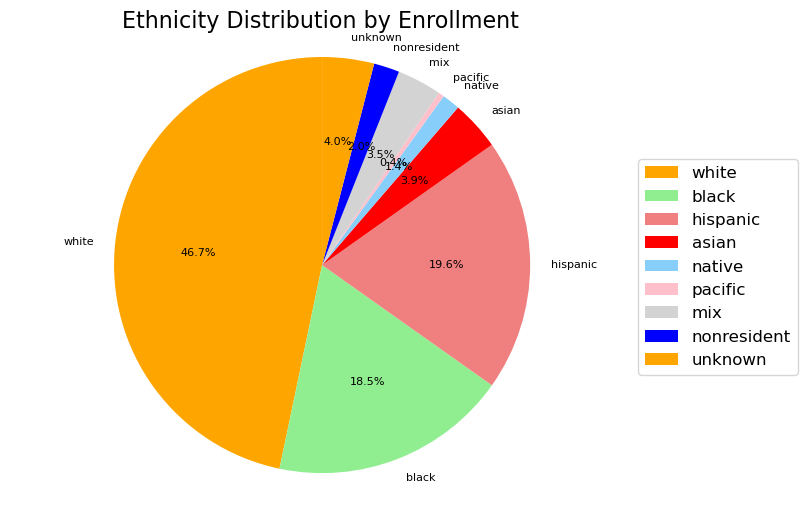

In [123]:
# Extract the required columns from the DataFrame
ethnicity_data = test_ethnicity_clean[[
    "enrollment_proportion_white",
    "enrollment_proportion_black",
    "enrollment_proportion_hispanic",
    "enrollment_proportion_asian",
    "enrollment_proportion_native",
    "enrollment_proportion_pacific",
    "enrollment_proportion_mix",
    "enrollment_proportion_nonresident",
    "enrollment_proportion_unknown"
]]

# Rename the columns to desired labels
ethnicity_data.columns = [
    "white",
    "black",
    "hispanic",
    "asian",
    "native",
    "pacific",
    "mix",
    "nonresident",
    "unknown"
]

# Count the occurrences of each ethnicity category
ethnicity_counts = ethnicity_data.sum().values

# Calculate the percentage of each ethnicity
total = sum(ethnicity_counts)
ethnicity_percentages = [count / total * 100 for count in ethnicity_counts]

# Define a custom color scheme
colors = ['orange', 'lightgreen', 'lightcoral', 'red', 'lightskyblue', 'pink', 'lightgray', 'blue']

# Plot the pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as desired
patches, texts, _ = plt.pie(ethnicity_percentages, labels=ethnicity_data.columns, autopct='%1.1f%%', colors=colors,
                            startangle=90, textprops={'fontsize': 8}, labeldistance=1.1)  # Increase labeldistance

# Add a title
plt.title('Ethnicity Distribution by Enrollment', fontsize=16)  # Increase the fontsize for better visibility

# Create a legend outside the pie chart
plt.legend(patches, ethnicity_data.columns, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Make the pie chart circular
plt.axis('equal')

# Display the chart
plt.show()




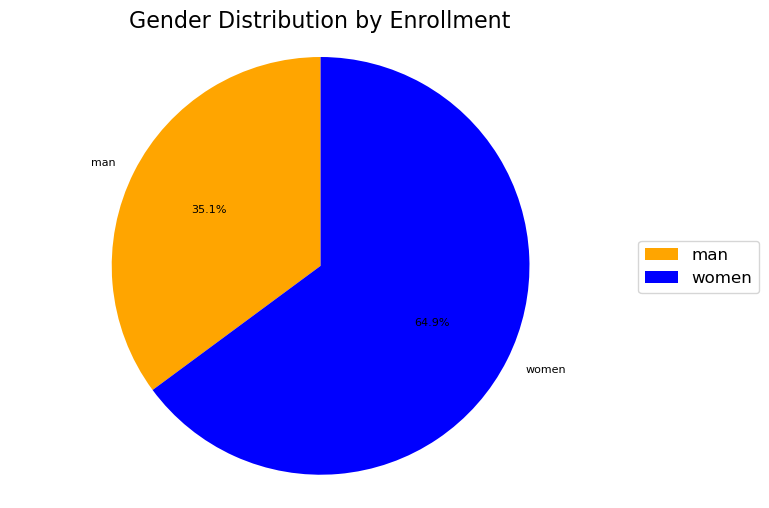

In [124]:
# Extract the required columns from the DataFrame
gender_data = test_ethnicity_clean[["enrollment_percentage_man", "enrollment_percentage_women"]]

# Remove "enrollment_percentage_" prefix from column names
column_names = [col.replace("enrollment_percentage_", "") for col in gender_data.columns]

# Calculate the sum of each gender category
gender_counts = gender_data.sum().values

# Calculate the total count
total = sum(gender_counts)

# Calculate the percentage of each gender
gender_percentages = [count / total * 100 for count in gender_counts]

# Define a custom color scheme
colors = ['orange', 'blue']

# Plot the pie chart
plt.figure(figsize=(8, 6))
patches, _, _ = plt.pie(gender_percentages, labels=column_names, autopct='%1.1f%%', colors=colors,
                        startangle=90, textprops={'fontsize': 8}, labeldistance=1.1)

# Add a title
plt.title('Gender Distribution by Enrollment', fontsize=16)

# Create a legend outside the pie chart
plt.legend(patches, column_names, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Make the pie chart circular
plt.axis('equal')

# Display the chart
plt.show()

In [125]:
merge_collegelocation=pd.merge(test_location_clean, test_major_clean, on=["name", "id"], how="inner")

# Excluding the states out of mainland
merge_collegelocation= merge_collegelocation.loc[(merge_collegelocation["state"] != "MP") & 
                                                 (merge_collegelocation["state"] != "VI") & 
                                                 (merge_collegelocation["state"] != "PW") & 
                                                 (merge_collegelocation["state"] != "AS") &
                                                 (merge_collegelocation["state"] != "MH") &
                                                 (merge_collegelocation["state"] != "FM") &
                                                 (merge_collegelocation["state"] != "GU")]


state = merge_collegelocation.groupby("state")["name"].count()

count = pd.DataFrame(state)

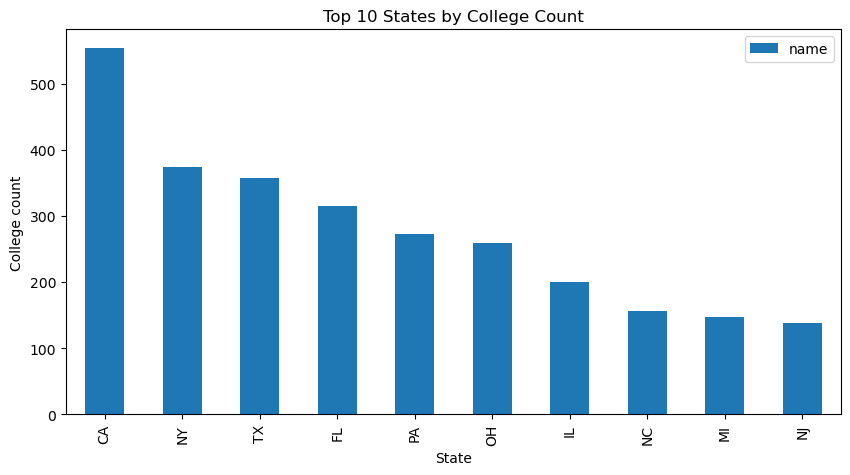

In [126]:
sorted_count = count.sort_values('name', ascending=False)

top_15 = sorted_count.head(10)

top_15.plot(kind='bar', title='Top 10 States by College Count', 
        ylabel='College count', xlabel='State', figsize=(10,5))

plt.show()

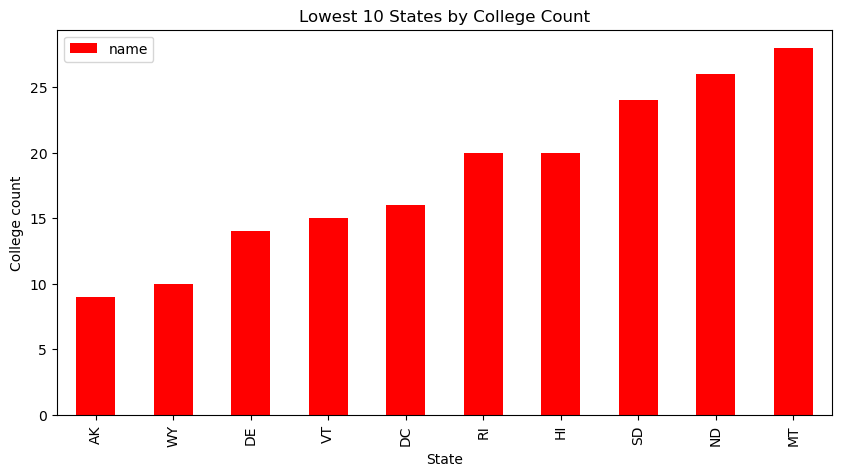

In [127]:
sorted_count = count.sort_values('name', ascending=True)

lowest_15 = sorted_count.head(10)

lowest_15.plot(kind='bar', title='Lowest 10 States by College Count', 
        ylabel='College count', xlabel='State', figsize=(10,5),color= "r")

plt.show()

In [128]:
#we calculated the total amounts in each column per major to determine the percentage of each major by state
merge_collegelocation['Max_Major'] = merge_collegelocation.loc[:,'percentage_of_agriculture_major':'percentage_of_history_major'].idxmax(axis=1)
# Remove the common prefix from the values in the column
merge_collegelocation['Max_Major'] = merge_collegelocation['Max_Major'].str.replace('percentage_of_', '').str.rstrip('_major')
#grouped the bar chart by state and major
major_by_state = merge_collegelocation.groupby(['state', 'Max_Major']).size().unstack()
#calculated and sorted the chart by total percentage of each major
major_by_state['Total'] = major_by_state.sum(axis=1)
major_by_state = major_by_state.sort_values('Total', ascending=False)


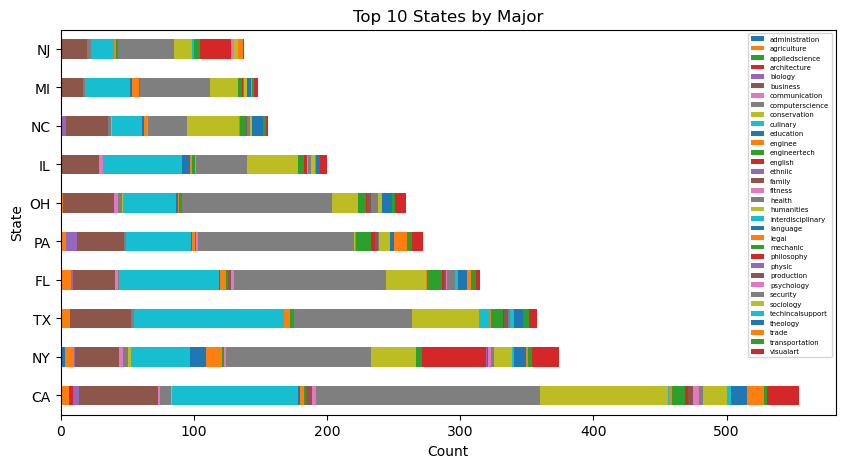

In [129]:
#created a horizontal bar chart while removing the "total" amount to make the chart more readable
top_10_states = major_by_state.head(10)
top_10_states = top_10_states.drop('Total',axis=1)
top_10_states.plot(kind='barh', stacked=True, figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Top 10 States by Major')
#shrunk the legend
plt.legend().set_title('')
plt.legend(prop={'size': 5})

plt.show()

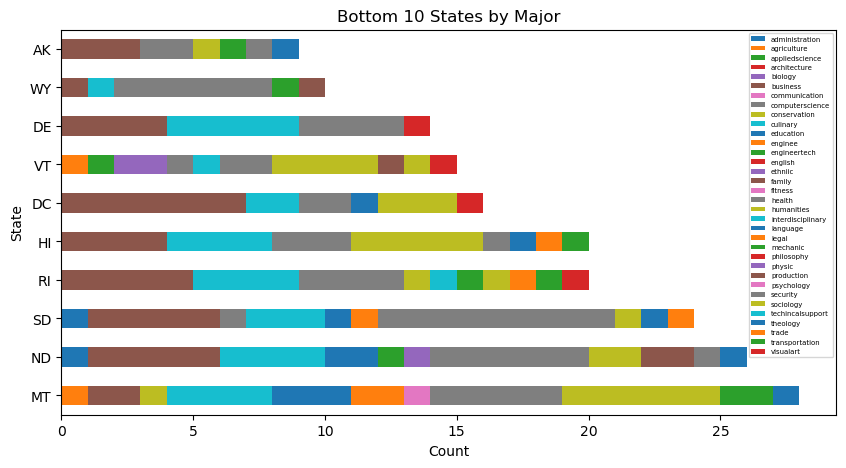

In [130]:
#removed outliers
states_to_exclude = ['GU', 'PW', 'VI', 'MH', 'FM', 'AS', 'MP']
major_by_state = major_by_state[~major_by_state.index.isin(states_to_exclude)]
lowest_10_states = major_by_state.tail(10)
lowest_10_states = lowest_10_states.drop('Total',axis=1)
lowest_10_states.plot(kind='barh', stacked=True, figsize=(10, 5))
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Bottom 10 States by Major')

plt.legend().set_title('')
plt.legend(prop={'size': 5})

plt.show()

In [131]:
## Tuition Visualization on Map
filter_data = pd.merge(test_location_clean, test_financial_clean, on = ['id','name'], how = 'inner')

# Excluding the states out of mainland
filter_data= filter_data.loc[(filter_data["state"] != "MP") & 
                             (filter_data["state"] != "VI") &
                             (filter_data["state"] != "PW") & 
                             (filter_data["state"] != "AS") &
                             (filter_data["state"] != "MH") &
                             (filter_data["state"] != "FM") &
                             (filter_data["state"] != "GU")]

# Select relevant columns for institution type data
institution_data = filter_data[["id", "name", "lat", "lng", "cost_of_admission","public/private"]]

# Convert latitude and longitude columns to float
institution_data["lat"] = institution_data["lat"].astype(float)
institution_data["lng"] = institution_data["lng"].astype(float)

# Define the color mapping for institution types
color_mapping = {1: "blue", 2: "red", 3: "green"}

# Group the data by 'public/private' column
grouped_data = institution_data.groupby('public/private')

# Create a separate map for each category
for category, group in grouped_data:
    # Create the map plot for the current category
    institution_map = group.hvplot.points(
        "lng",
        "lat",
        geo=True,
        tiles="OSM",
        frame_width=700,
        frame_height=500,
        color="public/private",
        cmap=color_mapping,
        size="cost_of_admission",
        alpha=0.5,
        scale=0.03,
        hover_cols=["name", "public/private"],
        legend=True,
        title=f"Map for {category}"
    )
    
    
    # Display the map for the current category
    display(institution_map)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (public/private,cost_of_admission,name)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (public/private,cost_of_admission,name)

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [lng,lat]   (public/private,cost_of_admission,name)

### 3. Data Analysis

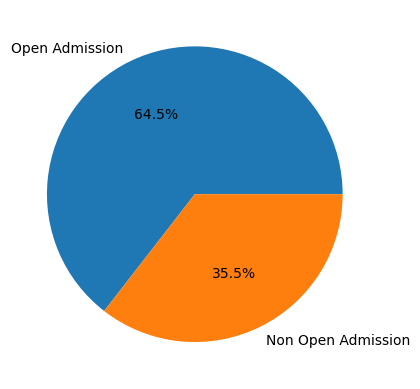

In [132]:
test = pd.merge(test_location_clean, test_financial_clean, on=["id","name"], how= "inner")

indexadm = test[ (test['openadmp'] == 2.0) & (test['openadmp'] == 3.0) ].index
new_clean_df = test.drop(indexadm)


# grouping by open adm to get number of colleges in open and non open

group = new_clean_df.groupby("openadmp")["id"].count()
group_df = pd.DataFrame(group)
group_df_reset = group_df.reset_index()

# displaying percentage of open vs non open colleges

labels = ["Open Admission", "Non Open Admission"]
ax = group_df_reset.plot.pie(y='id', labels=labels, autopct='%1.1f%%')
ax.set_ylabel("")
ax.legend().set_visible(False)
plt.show()

In [133]:
# colleges that are openadm their cost and control
open_adm = new_clean_df.loc[new_clean_df["openadmp"] ==1.0, ["id", "name", "cost_of_admission", "control"]]

# group by colleges by control and average of cost for each group
mean_cost = open_adm.groupby("control")["cost_of_admission"].mean().round()
mean_cost_df = pd.DataFrame(mean_cost)
mean_reset = mean_cost_df.reset_index()

# colleges that are not open admission their cost and control
non_open_adm = new_clean_df.loc[new_clean_df["openadmp"] !=1.0, ["id", "name", "cost_of_admission", "control"]]

# group by colleges by control and average of cost for each group
non_mean_cost = non_open_adm.groupby("control")["cost_of_admission"].mean().round()
non_mean_cost_df = pd.DataFrame(non_mean_cost)
non_mean_reset = non_mean_cost_df.reset_index()

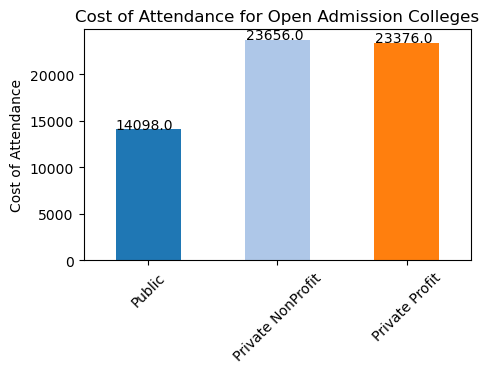

In [134]:
# displaying avg cost of open adm colleges 
# Define a colormap

num_categories = len(mean_reset['control'].unique())
ax = mean_reset.plot.bar(x= 'control', y='cost_of_admission', color=plt.cm.tab20(range(num_categories)), 
                         title="Cost of Attendance for Open Admission Colleges", figsize=(5,3))
new_labels = ['Public', 'Private NonProfit', 'Private Profit']
ax.set_xticklabels(new_labels, rotation=45)
ax.set_xlabel("")
ax.set_ylabel("Cost of Attendance")
ax.legend().set_visible(False)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

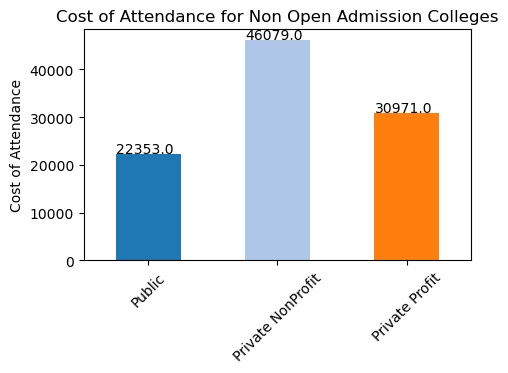

In [135]:
# displaying avg cost of open adm colleges 
non_num_categories = len(non_mean_reset['control'].unique())

ax = non_mean_reset.plot.bar(x= 'control', y='cost_of_admission', color=plt.cm.tab20(range(num_categories)), 
                         title="Cost of Attendance for Non Open Admission Colleges", figsize=(5,3))
non_new_labels = ['Public', 'Private NonProfit', 'Private Profit']
ax.set_xticklabels(new_labels, rotation=45)
ax.set_xlabel("")
ax.set_ylabel("Cost of Attendance")
ax.legend().set_visible(False)


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

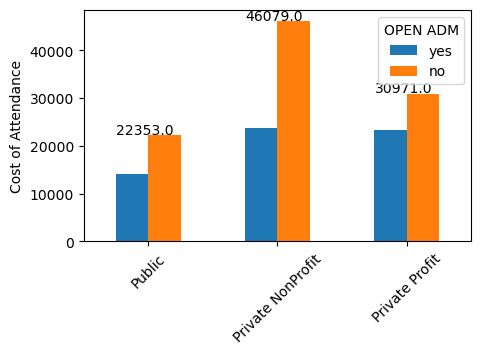

In [136]:
# merging open and non open data frames

combine = new_clean_df.groupby(["openadmp", "control"])["cost_of_admission"].mean().round()
combine_df = pd.DataFrame(combine)
combine_df_reset = combine_df.reset_index()

pivot = pd.pivot_table(data=combine_df_reset, index=['control'], 
                       columns=['openadmp'], values='cost_of_admission')

cb = pivot.plot( kind='bar', figsize=(5,3))
combined_labels = ['Public', 'Private NonProfit', 'Private Profit']
cb.set_xticklabels(combined_labels, rotation=45)
cb.set_xlabel("")
cb.set_ylabel("Cost of Attendance")
plt.legend(["yes", "no"], title="OPEN ADM")
for p in ax.patches:
    cb.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#### 3.1 Linearity testing

In [137]:
# Preparing datasets for analysis
filter_data = pd.merge(test_location_clean, test_financial_clean, on = ["id","name"], how = "inner")

filter_data["student_number_pellgrant"] = filter_data["percentage_of_pellgrant"] * filter_data["student_count"]
filter_data["student_number_federalloan"] = filter_data["percentage_of_federalloan"] * filter_data["student_count"]

select_data = filter_data[["id",
                            "name",
                            "cost_of_admission",
                            "public/private",
                            "student_number_pellgrant",
                            "student_number_federalloan",
                            "percentage_of_pellgrant",
                            "percentage_of_federalloan"
                            
]]

In [138]:
# Linear Regression modeling
analysis1_data = select_data.loc[select_data["public/private"] == 1, :]

x_values = analysis1_data["cost_of_admission"]
y_values = analysis1_data["student_number_federalloan"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

The r-squared is: 0.5068787092355779


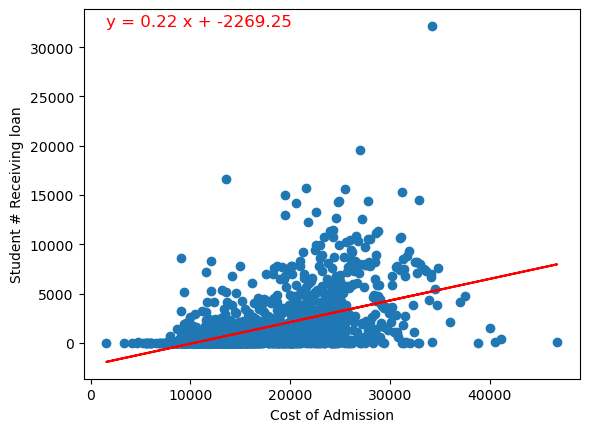

In [139]:
# Plotting the Data
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.text(x_values.min(), y_values.max(), line_eq, fontsize=12, color="red")
plt.xlabel("Cost of Admission")
plt.ylabel("Student # Receiving loan")
print(f"The r-squared is: {rvalue}")
plt.show() 

In [140]:
# Linear Regression modeling
analysis2_data = select_data.loc[select_data["public/private"] != 1, :]

x_values = analysis2_data["cost_of_admission"]
y_values = analysis2_data["student_number_federalloan"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

The r-squared is: 0.1680777690625478


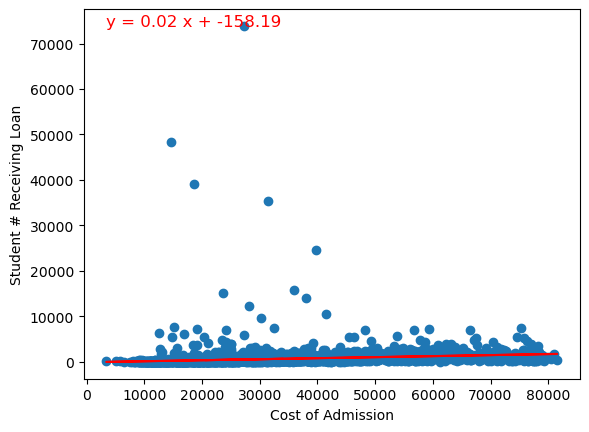

In [141]:
# Plotting the Data
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.text(x_values.min(), y_values.max(), line_eq, fontsize=12, color="red")
plt.xlabel("Cost of Admission")
plt.ylabel("Student # Receiving Loan")
print(f"The r-squared is: {rvalue}")
plt.show() 

As part of our analysis, we sought to examine the relationship between the number of students receiving federal loans and the admission cost, focusing on public and private institutions separately. In the case of public colleges, we discovered a strong and significant linear relationship between these two variables, indicating that as the number of students receiving federal loans increased, the admission cost tended to follow a predictable pattern. However, when exploring private colleges, we found a substantially weaker relationship between the number of loan recipients and the admission cost. This suggests that other factors may have a more dominant influence on the cost of admission in private institutions, making the relationship less apparent or less consistent.

#### 3.2 Hypothesis Testing

Independent t-tests will compare the means of 2 independent populations.

* **Assumptions**

    * Data is normally distributed
    * Data is independent
    * Data is homogenous (The standard deviations are roughly equal)

In [142]:
population1 = select_data.loc[select_data["public/private"] == 1, :]["cost_of_admission"]

population2 = select_data.loc[select_data["public/private"] != 1, :]["cost_of_admission"]

*$H_{0}$*: The averages of the samples are the same.

*$H_{1}$*: The averages of the samples are different.

In [143]:
def gendata(loc1=0, loc2=0):

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population1)), population1, label="public school")
    plt.scatter(range(len(population2)), population2, label="private school")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population1, 10, density=True, alpha=0.7, label="public school")
    plt.hist(population2, 10, density=True, alpha=0.7, label="private school")
    plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population1, population2

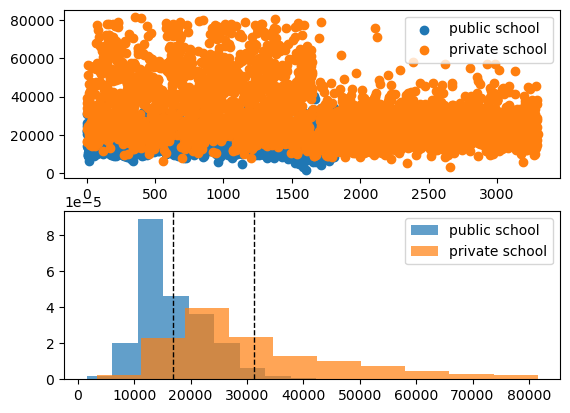

In [144]:
# Generate some data and show the scatter plot
population1, population2 = gendata()

In [145]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-47.8970591011592, pvalue=0.0)

In this analysis, we investigated the admission cost between private and public schools. The data used for testing was obtained from a DataFrame named select_data, which includes a categorical column indicating the school type as "public/private" and another column representing the cost of admission. We separated the data into two populations: population1 consisting of the admission costs for public schools (coded as 1) and population2 consisting of the admission costs for private schools (coded as 2 and 3).

To gain insights into the distribution of the data, scatter plots and histograms were generated. The scatter plot displayed the admission costs of both populations, while the histograms illustrated the distributions of admission costs for public and private schools separately. The mean admission costs were marked by dashed lines on the histograms.

To assess whether there was a statistically significant difference in the admission costs between public and private schools, an independent t-test was conducted using the stats.ttest_ind() function with the argument equal_var=False, which performs Welch's t-test to account for potentially unequal population variances. The resulting p-value from the t-test was found to be very small, indicating strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the admission costs between public and private schools.

### 4. Conclustion

In summary, our analysis aimed to compare and analyze public and private colleges in the United States, focusing on factors such as enrollment, tuition fees, graduation rates, student-faculty ratios, and financial aid availability. We specifically examined the relationship between the number of students receiving federal loans and the admission cost, separately for public and private institutions.

For public colleges, we found a strong and significant linear relationship between the number of loan recipients and the admission cost. This suggests that as the number of students receiving federal loans increased, the admission cost tended to follow a predictable pattern. On the other hand, when exploring private colleges, we observed a weaker relationship between the number of loan recipients and the admission cost, indicating that other factors may have a more dominant influence on the cost of admission in private institutions.

To assess the statistical significance of the difference in admission costs between public and private schools, we conducted an independent t-test. The t-test results revealed a very small p-value, providing strong evidence against the null hypothesis. Therefore, we concluded that there is a significant difference in the admission costs between public and private schools.

Based on our analysis, we can conclude that public and private colleges in the United States differ in terms of admission costs. Public schools show a more pronounced relationship between the number of loan recipients and admission costs, suggesting a more predictable cost pattern. Private institutions, on the other hand, exhibit a weaker relationship, indicating that other factors contribute to the cost of admission.

These findings highlight the importance of considering the type of institution when making college choices, as the cost of admission can vary significantly. Prospective students should carefully evaluate their financial situation, academic goals, and the overall value provided by public and private colleges to make informed decisions that align with their needs and aspirations.